## From Kaggle 
Content:

Dataset on Countires

The target feature is:

Cateogrize countries using socio-economic and health factors that determine the overall development of the country

The feature sets are:\
country\
child mortality\
exports\
health\
imports\
income\
inflation\
life expectancy\
gdpp\
total fertility

Import and Load Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

country = pd.read_csv('Country-data.csv')
country.info()
display(country)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()

X = country.iloc[:, 1:]
X = sc.fit_transform(X)

Figure out elbow number for optimal clusters

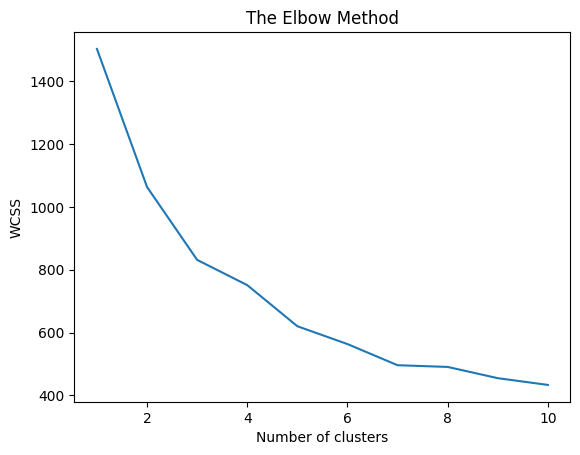

In [3]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Train using approximately 5 clusters

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 4, 0, 2, 2, 0, 0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 4, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

Visualiza Clusters

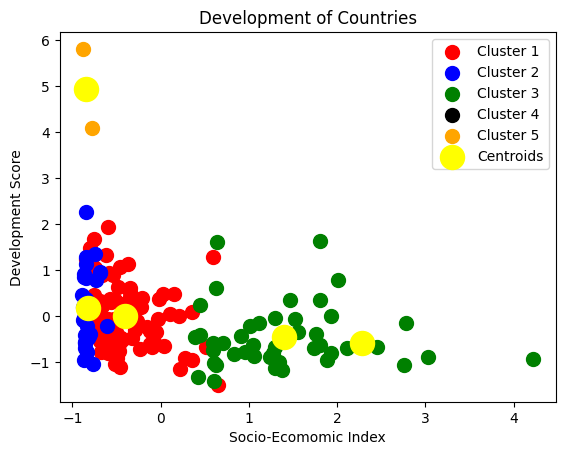

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Development of Countries')
plt.xlabel('Socio-Ecomomic Index')
plt.ylabel('Development Score')
plt.legend()
plt.show()

Hierarchical Clustering Using Scipy

In [ ]:
import scipy.cluster.hierarchy as sch

Create Dendogram For Optimal Clusters

Text(0.5, 1.0, 'Dendogram')

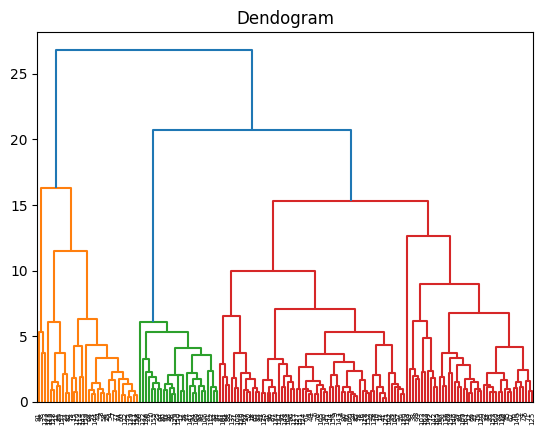

In [ ]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')

Train the Hierarchical Model Using 5 Clusters

In [18]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hier.fit_predict(X)

Visualize the Clusters

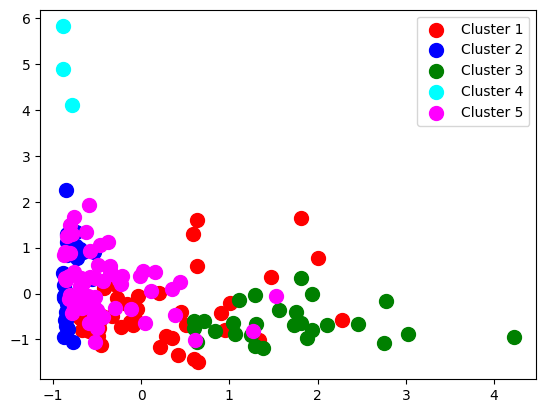

Bad pipe message: %s [b'"Chromium";v="130", "Google Chrome";v="130", "Not?A_Brand']
Bad pipe message: %s [b'v="99"\r\nsec-ch-ua-mobile: ?0\r\nsec', b'h-ua-platform: "Windows"\r\nDNT: 1\r\nUpgrade-In', b'cure-Requests: 1\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chr', b'e/130.0.0.0 Safari/537.36\r\nAccept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp', b'mage/apng,*/*;q=0.8,application/signed-exch', b'ge;v=b3;q=0.7\r\nSec-Fetch-Site: none\r\nSec-Fetch-Mode: navigate\r\nSec-Fetch-User: ?1\r\nSec-Fetch-Des']
Bad pipe message: %s [b'ol: max-age=0\r\nsec-ch-ua: "Chromium";v="130", "Google Chrome";v="130", "Not?A_Brand";v="99"\r\nsec-ch-ua-mobile: ?0\r\n']
Bad pipe message: %s [b'c-ch-ua-platform: "Windows"\r\nDNT: 1\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64', b'x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0']
Bad pipe message: %s [b' Safari/537.36\r\nAcce

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.legend()
plt.show()

# Explanation

The x-axis can be defined as the Socio-Economic Index. It represents a composite score that captures overall development.

The y-axis is a more general 'Development Score' that captures the range of socio-economic and health factors to overall development.

For the Kmeans model, the elbow method was used to determine the optimal amounts of clusters for modeling. In our case the elbow seemed to even out at around 5 clusters.

The Agglomerative method uses a Dendogram, the vertical line counted 5 clusters as well. If we were to use 7 clusters, there seems to be outliers that should be grouped together and makes no sense at to why there is a single different dot in the middle of a cluster.